In [1]:
import pandas as pd
from sodapy import Socrata

# in place of application token, and no username or password:
client = Socrata("chronicdata.cdc.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(chronicdata.cdc.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("fn2i-3j6c", limit=50000)

In [2]:
# Convert to pandas DataFrame
results_df2 = pd.DataFrame.from_records(results)

In [3]:
results_df2[0:5]

,break_out,break_out_category,breakoutcategoryid,breakoutid,class,classid,confidence_limit_high,confidence_limit_low,data_value,data_value_footnote,...,locationdesc,locationid,question,questionid,response,responseid,sample_size,topic,topicid,year
0,25-34,Age Group,CAT3,AGE02,Demographics,CLASS05,53.63,41.87,47.75,NaN,...,New Hampshire,33,How many children live in your household? (var...,_CHLDCNT,None,RESP095,238,Number of Children,TOPIC39,2016
1,"$35,000-$49,999",Household Income,CAT6,INCOME4,Chronic Health Indicators,CLASS03,3.52,0.94,2.23,NaN,...,Montana,30,Ever told you have kidney disease?,CHCKIDNY,Yes,RESP046,24,Kidney,TOPIC35,2016
2,"Black, non-Hispanic",Race/Ethnicity,CAT4,RACE02,Demographics,CLASS05,8.77,4.49,6.63,NaN,...,Delaware,10,What is your marital status?,MARITAL,Widowed,RESP035,58,Marital Status,TOPIC38,2016
3,"Other, non-Hispanic",Race/Ethnicity,CAT4,RACE06,Immunization,CLASS11,NaN,NaN,NaN,Prevalence estimate not available if the unwei...,...,Nevada,32,Adults aged 65+ who have ever had a pneumonia ...,_PNEUMO2,No,RESP054,10,Pneumonia Vaccination,TOPIC46,2016
4,25-34,Age Group,CAT3,AGE02,Health Status,CLASS08,26.46,21.92,24.19,NaN,...,California,06,How is your general health?,GENHLTH,Excellent,RESP056,499,Overall Health,TOPIC41,2016


In [4]:
results_df2['topic'][0:10]

0       Number of Children
1                   Kidney
2           Marital Status
3    Pneumonia Vaccination
4           Overall Health
5                   Asthma
6            Teeth Removed
7                Mammogram
8       Number of Children
9                     Race
Name: topic, dtype: object

In [5]:
import numpy as np
differentTypes = np.unique(results_df2['topic'])
print(differentTypes)

['Aerobic Activity' 'Age' 'Alcohol Consumption' 'All Teeth Removed'
 'Arthritis' 'Asthma' 'BMI Categories' 'Binge Drinking' 'Blood Stool Test'
 'COPD' 'Cardiovascular Disease' 'Cholesterol Checked' 'Colonoscopy'
 'Current Smoker Status' 'Dental Visit' 'Depression' 'Diabetes'
 'Disability status' 'Drink and Drive' 'E-Cigarette Use' 'Education'
 'Employment' 'Exercise' 'Fair or Poor Health' 'Flu Shot' 'HIV Test'
 'Health Care Cost' 'Health Care Coverage' 'Heavy Drinking' 'Income'
 'Internet' 'Kidney' 'Last Checkup' 'Mammogram' 'Marital Status'
 'Number of Children' 'Other Cancer' 'Overall Health' 'PSA Test'
 'Pap Test' 'Personal Care Provider' 'Physical Activity Index'
 'Pneumonia Vaccination' 'Race' 'Rent/Own Home' 'Seatbelt Use' 'Sex'
 'Shingle Vaccination' 'Sigmoidoscopy' 'Skin Cancer' 'Smokeless Tobacco'
 'Smoker Status' 'Strength Activity' 'Teeth Removed'
 'USPSTF Recommendations' 'Under 65 Coverage' 'Veteran Status' 'Vision']


In [6]:
results_df2['topic'].value_counts()

Disability status          3171
Employment                 2524
Marital Status             1911
Cardiovascular Disease     1845
E-Cigarette Use            1828
Number of Children         1817
Race                       1680
Overall Health             1582
Last Checkup               1542
Age                        1402
Asthma                     1351
Smoker Status              1318
Income                     1293
BMI Categories             1232
Diabetes                   1178
Mammogram                  1108
Education                  1100
Blood Stool Test           1020
Rent/Own Home               938
Personal Care Provider      934
Smokeless Tobacco           871
HIV Test                    676
Arthritis                   673
Alcohol Consumption         664
Depression                  659
Health Care Coverage        655
Internet                    653
COPD                        644
Other Cancer                642
Health Care Cost            641
Kidney                      639
Heavy Dr

In [7]:
results_df2['topic'].value_counts()[:15]

Disability status         3171
Employment                2524
Marital Status            1911
Cardiovascular Disease    1845
E-Cigarette Use           1828
Number of Children        1817
Race                      1680
Overall Health            1582
Last Checkup              1542
Age                       1402
Asthma                    1351
Smoker Status             1318
Income                    1293
BMI Categories            1232
Diabetes                  1178
Name: topic, dtype: int64

In [8]:
topic_df = pd.DataFrame(results_df2['topic'].value_counts()[:15],columns=['topic'])

In [9]:
topic_df

,topic
Disability status,3171
Employment,2524
Marital Status,1911
Cardiovascular Disease,1845
E-Cigarette Use,1828
Number of Children,1817
Race,1680
Overall Health,1582
Last Checkup,1542
Age,1402


In [10]:
topic_df.columns.tolist()

['topic']

In [11]:
topic_df.index.tolist()

['Disability status',
 'Employment',
 'Marital Status',
 'Cardiovascular Disease',
 'E-Cigarette Use',
 'Number of Children',
 'Race',
 'Overall Health',
 'Last Checkup',
 'Age',
 'Asthma',
 'Smoker Status',
 'Income',
 'BMI Categories',
 'Diabetes']

In [12]:
topic_df['topic']['Race']

1680

Plot the chart of the most popular record topics in this initial sample of the dataset (1st 2000 rows available without an access token).

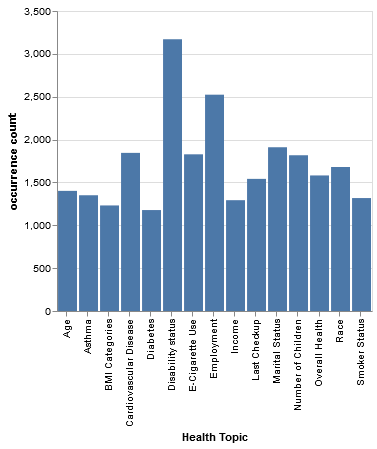

In [13]:
import altair as alt
import pandas as pd

# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

data = pd.DataFrame({'Health Topic': topic_df.index.tolist(),
                     'occurrence count': topic_df['topic'].values})
alt.Chart(data).mark_bar().encode(
    x='Health Topic',
    y='occurrence count',
)

In [14]:
results_index = results_df2['topic'] == 'Skin Cancer'
skin_df = results_df2[results_index]
print('shape of skin_df:',skin_df.shape)
skin_df[0:5]

shape of skin_df: (623, 27)


,break_out,break_out_category,breakoutcategoryid,breakoutid,class,classid,confidence_limit_high,confidence_limit_low,data_value,data_value_footnote,...,locationdesc,locationid,question,questionid,response,responseid,sample_size,topic,topicid,year
228,35-44,Age Group,CAT3,AGE03,Chronic Health Indicators,CLASS03,NaN,NaN,NaN,Prevalence estimate not available if the unwei...,...,Texas,48,Ever told you had skin cancer?,CHCSCNCR,Yes,RESP046,18,Skin Cancer,TOPIC53,2016
450,"Asian, non-Hispanic",Race/Ethnicity,CAT4,RACE04,Chronic Health Indicators,CLASS03,NaN,NaN,NaN,Prevalence estimate not available if the unwei...,...,South Dakota,46,Ever told you had skin cancer?,CHCSCNCR,Yes,RESP046,1,Skin Cancer,TOPIC53,2016
485,Female,Gender,CAT2,SEX2,Chronic Health Indicators,CLASS03,8.34,6.62,7.48,NaN,...,Kentucky,21,Ever told you had skin cancer?,CHCSCNCR,Yes,RESP046,581,Skin Cancer,TOPIC53,2016
666,65+,Age Group,CAT3,AGE09,Chronic Health Indicators,CLASS03,83.68,78.62,81.15,NaN,...,Wyoming,56,Ever told you had skin cancer?,CHCSCNCR,No,RESP054,1493,Skin Cancer,TOPIC53,2016
688,Female,Gender,CAT2,SEX2,Chronic Health Indicators,CLASS03,94.69,92.33,93.51,NaN,...,Arkansas,05,Ever told you had skin cancer?,CHCSCNCR,No,RESP054,2949,Skin Cancer,TOPIC53,2016


In [15]:
yes_index  = skin_df['response'] == 'Yes'
yes_index

228       True
450       True
485       True
666      False
688      False
727       True
794      False
912       True
998       True
1167     False
1212      True
1246      True
1271      True
1368      True
1560      True
1681     False
1996      True
2027      True
2181      True
2260      True
2308      True
2439      True
2502     False
2532     False
2537     False
2539      True
2650     False
2667     False
2681     False
2768      True
         ...  
47284     True
47302    False
47546     True
47564     True
47764    False
47865    False
47945     True
48007     True
48189     True
48252    False
48337    False
48445    False
48679     True
48760    False
48790    False
48810     True
48872     True
49024     True
49169     True
49220    False
49310    False
49336     True
49342    False
49411    False
49481    False
49506     True
49599    False
49690     True
49729    False
49904     True
Name: response, Length: 623, dtype: bool

In [16]:
skin_df[yes_index]

,break_out,break_out_category,breakoutcategoryid,breakoutid,class,classid,confidence_limit_high,confidence_limit_low,data_value,data_value_footnote,...,locationdesc,locationid,question,questionid,response,responseid,sample_size,topic,topicid,year
228,35-44,Age Group,CAT3,AGE03,Chronic Health Indicators,CLASS03,NaN,NaN,NaN,Prevalence estimate not available if the unwei...,...,Texas,48,Ever told you had skin cancer?,CHCSCNCR,Yes,RESP046,18,Skin Cancer,TOPIC53,2016
450,"Asian, non-Hispanic",Race/Ethnicity,CAT4,RACE04,Chronic Health Indicators,CLASS03,NaN,NaN,NaN,Prevalence estimate not available if the unwei...,...,South Dakota,46,Ever told you had skin cancer?,CHCSCNCR,Yes,RESP046,1,Skin Cancer,TOPIC53,2016
485,Female,Gender,CAT2,SEX2,Chronic Health Indicators,CLASS03,8.34,6.62,7.48,NaN,...,Kentucky,21,Ever told you had skin cancer?,CHCSCNCR,Yes,RESP046,581,Skin Cancer,TOPIC53,2016
727,"$25,000-$34,999",Household Income,CAT6,INCOME3,Chronic Health Indicators,CLASS03,7.68,3.06,5.37,NaN,...,Massachusetts,25,Ever told you had skin cancer?,CHCSCNCR,Yes,RESP046,51,Skin Cancer,TOPIC53,2016
912,"White, non-Hispanic",Race/Ethnicity,CAT4,RACE01,Chronic Health Indicators,CLASS03,8.38,6.38,7.38,NaN,...,Louisiana,22,Ever told you had skin cancer?,CHCSCNCR,Yes,RESP046,402,Skin Cancer,TOPIC53,2016
998,H.S. or G.E.D.,Education Attained,CAT5,EDUCA2,Chronic Health Indicators,CLASS03,6.04,3.84,4.94,NaN,...,Georgia,13,Ever told you had skin cancer?,CHCSCNCR,Yes,RESP046,126,Skin Cancer,TOPIC53,2016
1212,"$35,000-$49,999",Household Income,CAT6,INCOME4,Chronic Health Indicators,CLASS03,10.33,6.09,8.21,NaN,...,Idaho,16,Ever told you had skin cancer?,CHCSCNCR,Yes,RESP046,98,Skin Cancer,TOPIC53,2016
1246,H.S. or G.E.D.,Education Attained,CAT5,EDUCA2,Chronic Health Indicators,CLASS03,6.71,4.39,5.55,NaN,...,New Hampshire,33,Ever told you had skin cancer?,CHCSCNCR,Yes,RESP046,139,Skin Cancer,TOPIC53,2016
1271,H.S. or G.E.D.,Education Attained,CAT5,EDUCA2,Chronic Health Indicators,CLASS03,6.52,4.12,5.32,NaN,...,New Jersey,34,Ever told you had skin cancer?,CHCSCNCR,Yes,RESP046,171,Skin Cancer,TOPIC53,2016
1368,65+,Age Group,CAT3,AGE09,Chronic Health Indicators,CLASS03,4.45,2.17,3.31,NaN,...,Puerto Rico,72,Ever told you had skin cancer?,CHCSCNCR,Yes,RESP046,69,Skin Cancer,TOPIC53,2016


In [17]:
results_index = results_df2['topic'] == 'E-Cigarette Use'
topic_df = results_df2[results_index]
print('shape of topic_df:',topic_df.shape)
print(topic_df[0:5])


shape of topic_df: (1828, 27)
                                           break_out  break_out_category  \
28                                             55-64           Age Group   
40                                    Some post-H.S.  Education Attained   
65                                           Overall             Overall   
83   American Indian or Alaskan Native, non-Hispanic      Race/Ethnicity   
126                                Less than $15,000    Household Income   

    breakoutcategoryid breakoutid            class  classid  \
28                CAT3      AGE05  E-Cigarette Use  CLASS19   
40                CAT5     EDUCA3  E-Cigarette Use  CLASS19   
65                CAT1        BO1  E-Cigarette Use  CLASS19   
83                CAT4     RACE03  E-Cigarette Use  CLASS19   
126               CAT6    INCOME1  E-Cigarette Use  CLASS19   

    confidence_limit_high confidence_limit_low data_value  \
28                  86.63                82.31      84.47   
40          

In [18]:
yes_index2  = topic_df['responseid'] == 'RESP216'
topic_df[yes_index2]

,break_out,break_out_category,breakoutcategoryid,breakoutid,class,classid,confidence_limit_high,confidence_limit_low,data_value,data_value_footnote,...,locationdesc,locationid,question,questionid,response,responseid,sample_size,topic,topicid,year
40,Some post-H.S.,Education Attained,CAT5,EDUCA3,E-Cigarette Use,CLASS19,3.99,2.57,3.28,NaN,...,Florida,12,E-cigarette use status,_ECIGSTS,Current E-cigarette user - some days,RESP216,288,E-Cigarette Use,TOPIC67,2016
131,"$15,000-$24,999",Household Income,CAT6,INCOME2,E-Cigarette Use,CLASS19,NaN,NaN,NaN,Prevalence estimate not available if the unwei...,...,Alaska,02,E-cigarette use status,_ECIGSTS,Current E-cigarette user - some days,RESP216,13,E-Cigarette Use,TOPIC67,2016
298,"$35,000-$49,999",Household Income,CAT6,INCOME4,E-Cigarette Use,CLASS19,NaN,NaN,NaN,Prevalence estimate not available if the unwei...,...,Alaska,02,E-cigarette use status,_ECIGSTS,Current E-cigarette user - some days,RESP216,6,E-Cigarette Use,TOPIC67,2016
462,Male,Gender,CAT2,SEX1,E-Cigarette Use,CLASS19,5.62,2.8,4.21,NaN,...,Wisconsin,55,E-cigarette use status,_ECIGSTS,Current E-cigarette user - some days,RESP216,61,E-Cigarette Use,TOPIC67,2016
612,"American Indian or Alaskan Native, non-Hispanic",Race/Ethnicity,CAT4,RACE03,E-Cigarette Use,CLASS19,NaN,NaN,NaN,Prevalence estimate not available if the unwei...,...,Massachusetts,25,E-cigarette use status,_ECIGSTS,Current E-cigarette user - some days,RESP216,3,E-Cigarette Use,TOPIC67,2016
972,H.S. or G.E.D.,Education Attained,CAT5,EDUCA2,E-Cigarette Use,CLASS19,6.46,3.24,4.85,NaN,...,Oklahoma,40,E-cigarette use status,_ECIGSTS,Current E-cigarette user - some days,RESP216,61,E-Cigarette Use,TOPIC67,2016
1394,"White, non-Hispanic",Race/Ethnicity,CAT4,RACE01,E-Cigarette Use,CLASS19,2.83,1.37,2.1,NaN,...,South Dakota,46,E-cigarette use status,_ECIGSTS,Current E-cigarette user - some days,RESP216,71,E-Cigarette Use,TOPIC67,2016
1450,"$35,000-$49,999",Household Income,CAT6,INCOME4,E-Cigarette Use,CLASS19,4.96,2.26,3.61,NaN,...,Washington,53,E-cigarette use status,_ECIGSTS,Current E-cigarette user - some days,RESP216,41,E-Cigarette Use,TOPIC67,2016
1481,"American Indian or Alaskan Native, non-Hispanic",Race/Ethnicity,CAT4,RACE03,E-Cigarette Use,CLASS19,NaN,NaN,NaN,Prevalence estimate not available if the unwei...,...,Maryland,24,E-cigarette use status,_ECIGSTS,Current E-cigarette user - some days,RESP216,5,E-Cigarette Use,TOPIC67,2016
1554,"$50,000+",Household Income,CAT6,INCOME5,E-Cigarette Use,CLASS19,2.62,1.32,1.97,NaN,...,Kentucky,21,E-cigarette use status,_ECIGSTS,Current E-cigarette user - some days,RESP216,64,E-Cigarette Use,TOPIC67,2016


In [19]:
yesskin_df = skin_df[yes_index]
yesskin_df['locationdesc'].value_counts()

Virginia                10
New Hampshire            9
Guam                     9
Puerto Rico              8
North Dakota             8
California               8
Alaska                   7
South Carolina           7
Kansas                   7
Montana                  7
Texas                    7
Louisiana                7
Kentucky                 7
Colorado                 7
Mississippi              7
Washington               7
Idaho                    6
Pennsylvania             6
New Mexico               6
Maryland                 6
Minnesota                6
Nevada                   6
Nebraska                 6
Florida                  6
New York                 6
Illinois                 6
District of Columbia     6
Massachusetts            6
Georgia                  6
Wisconsin                6
Missouri                 6
Connecticut              5
Utah                     5
Rhode Island             5
Oregon                   5
Michigan                 5
Tennessee                5
W

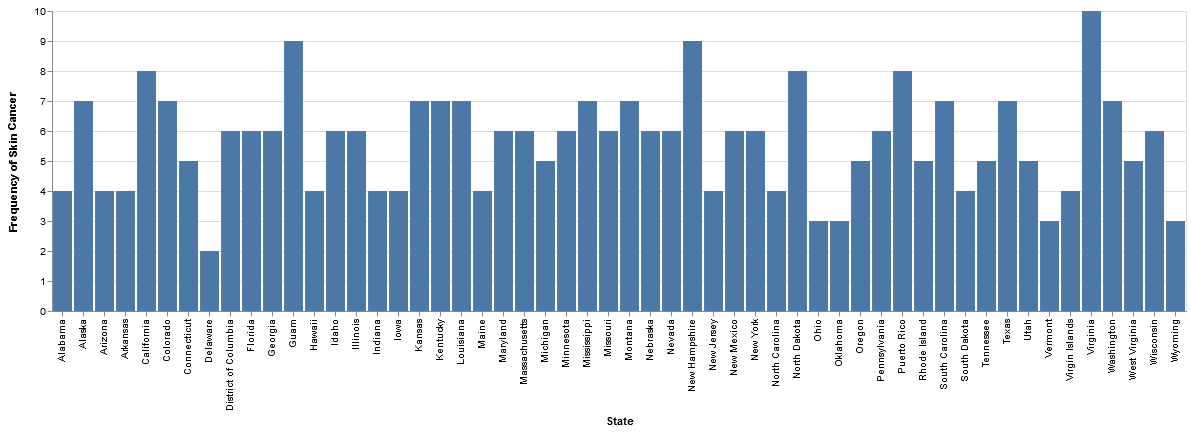

In [32]:
data = pd.DataFrame({'State': yesskin_df['locationdesc'].value_counts().index.tolist(),
                     'Frequency of Skin Cancer': yesskin_df['locationdesc'].value_counts()})
alt.Chart(data).mark_bar().encode(
    x='State',
    y='Frequency of Skin Cancer',
)

In [43]:
yes_index2  = topic_df['responseid'] != 'RESP215'
smoke_df = topic_df[yes_index2]

In [44]:
smoke_df['locationdesc'].value_counts()

Missouri                         40
South Dakota                     37
Georgia                          37
Delaware                         37
Alaska                           35
Guam                             35
New Mexico                       35
Kansas                           34
New Jersey                       34
Maryland                         34
Iowa                             33
Florida                          33
Kentucky                         33
Washington                       32
Nebraska                         32
Pennsylvania                     32
Oklahoma                         31
Alabama                          31
Connecticut                      31
North Carolina                   31
Indiana                          30
Tennessee                        30
Rhode Island                     30
Puerto Rico                      30
West Virginia                    30
Maine                            30
South Carolina                   30
Illinois                    